# Retele neur(on)ale

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## One-hot encoding

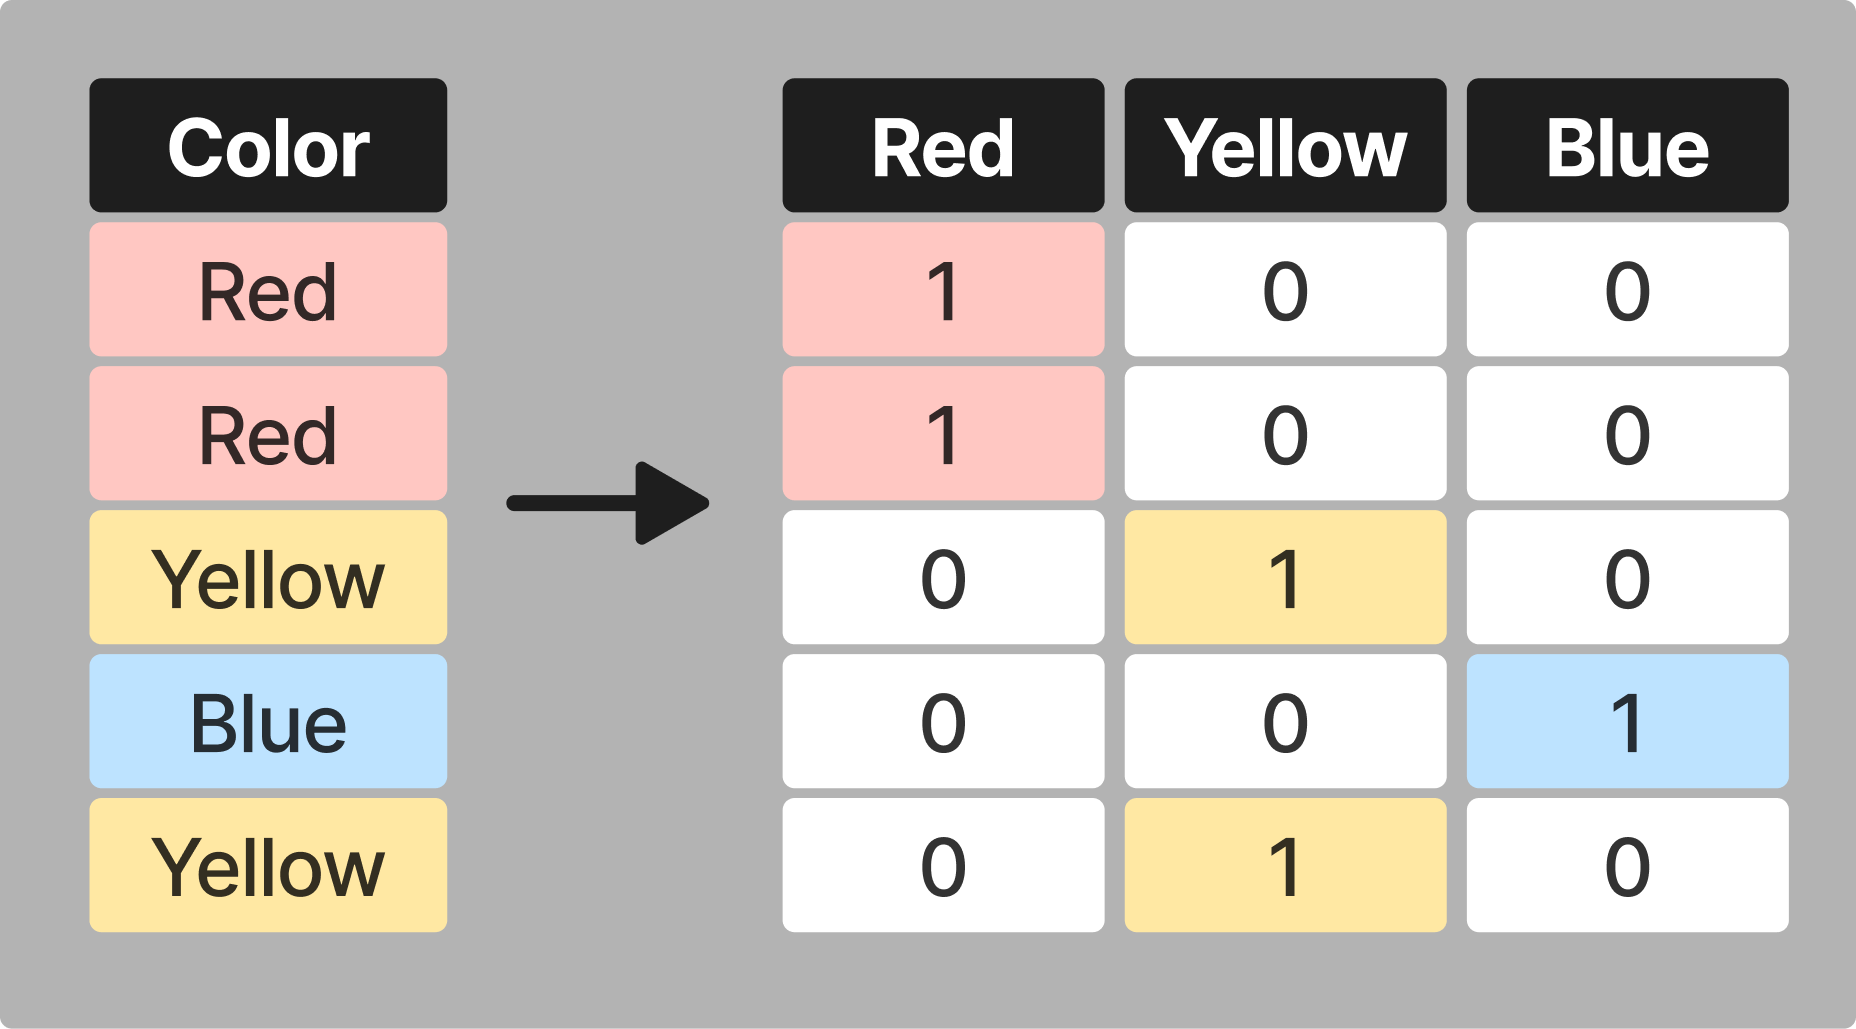

Defineste o functie care preproceseaza label-urile folosind `OneHotEncoder` (exemplu [aici](//scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [2]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(x):
  labels = np.array(x).reshape(-1, 1)
  encoder = OneHotEncoder(sparse_output=False)
  return encoder.fit_transform(labels)

one_hot_encode(['cat','kitten','cat','cat','cat','cat','small kitten'])

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Separabilitate liniara

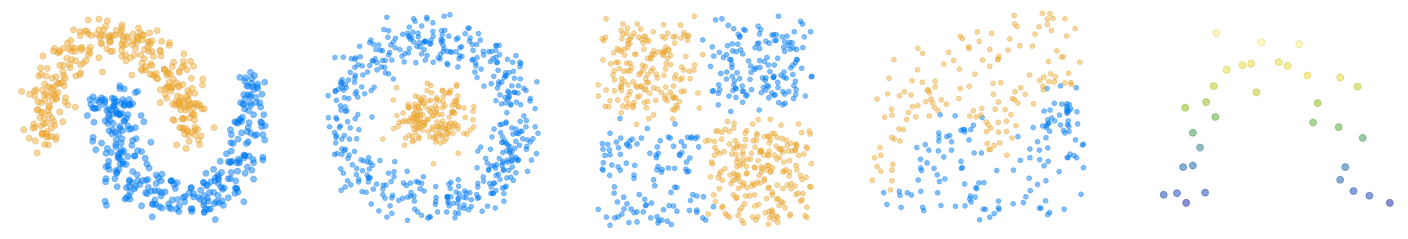

In cazul dataseturilor asemenea celor de mai sus, nu putem gasi o dreapta pentru clasificare sau regresie.

### Generarea datelor

Alege-ti un generator din sklearn (exemple [aici](//scikit-learn.org/dev/datasets/sample_generators.html)) si creeaza un set de date cu 5000 de observatii. Imparte-l in train si test cu `train_test_split`.




In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=5000, random_state=42, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
X[0:5]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

In [5]:
def plot(data, label):
    n = len(data)
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel="x", ylabel="y")

    pos_points = [data[i] for i in range(n) if label[i] == 1]
    neg_points = [data[i] for i in range(n) if label[i] == 0]

    ax.scatter(*zip(*pos_points),color='gold', edgecolors='white')
    ax.scatter(*zip(*neg_points),color='skyblue', edgecolors='white')
    plt.show()

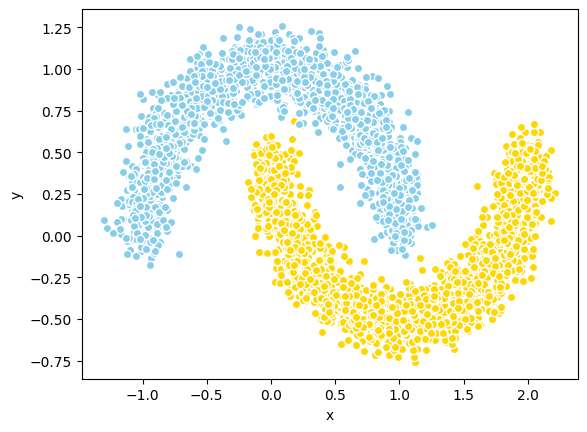

In [6]:
plot(X_train, y_train)


Avem nevoie de o linie curbata — *un scuigăl*.

Pentru a construi o curba ne putem folosi de mai multe functii neliniare, 2 dintre care sunt descrise mai jos.

## Functii de activare neliniare

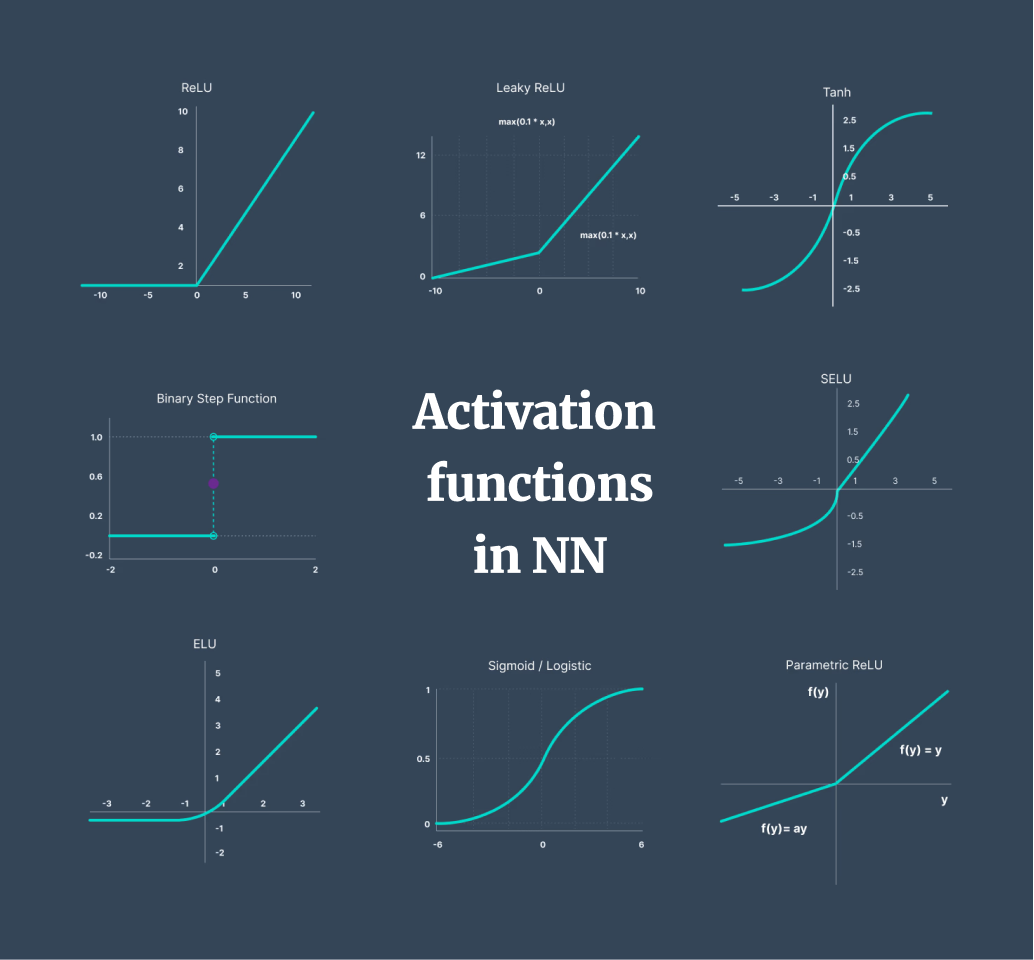

### ReLU

O functie extraordinar de simpla:
$$\text{ReLU}(x) = \begin{cases}
      x & (x \geq 0) \\
      0 & (x < 0)
   \end{cases}$$ sau, alternativ, $$\text{ReLU}(x) = \max(0, x)$$






Presupunand ca inputul este un vector `numpy`, implementeaza functia de mai sus (pur si simplu inlocuieste valori < 0 cu 0)

In [7]:
def relu(x):
    x[x < 0] = 0
    return x

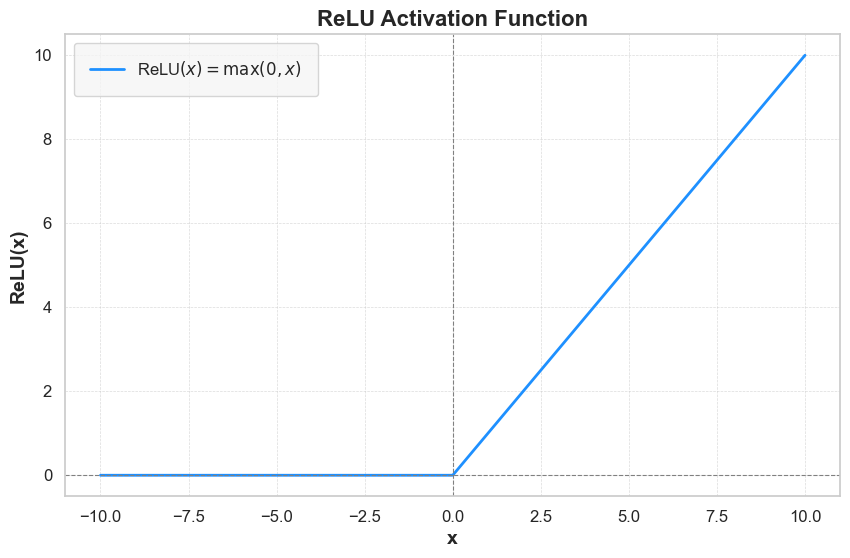

In [8]:
import seaborn as sns

sns.set(style="whitegrid")

x = np.linspace(-10, 10, 1000)
y = relu(np.linspace(-10, 10, 1000))

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"ReLU$(x) = \max(0, x)$", color="dodgerblue", linewidth=2)

plt.title("ReLU Activation Function", fontsize=16, fontweight='bold')
plt.xlabel("x", fontsize=14, fontweight='bold')
plt.ylabel("ReLU(x)", fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=False, fancybox=True, facecolor='whitesmoke', borderpad=1)

plt.show()

### Softmax




Fundamental, este o functie care primeste un vector si returneaza un vector de aceeasi marime.

$$\begin{bmatrix}
           z_{1} \\
           z_{2} \\
           \vdots \\
           z_{m}
\end{bmatrix} → \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{m}
\end{bmatrix}$$

Pentru asta foloseste formula urmatoare:

$$ y_i = \dfrac{e^{z_i}}{\displaystyle\sum^n_{k=1} e^{z_k}} $$

(nu este atat de complicata cat pare)

Obtinem un vector in care suma elementelor este 1 — util pentru a reflecta probabilitati!

Scrie o functie simpla care implementeaza formula de mai sus folosind `np.exp`.

In [9]:
def simple_softmax(x):
  exp = np.exp(x)
  return exp / exp.sum()

Nu ar fi ideal sa pastram implementarea de mai sus, pentru ca prin exponentiere repetata am putea ajunge la overflow!

Ca sa prevenim acest lucru, scadem din exponentul maximul din vectorul primit.



##### De ce functioneaza (pentru cei cu o pasiune deosebita pentru matematica)

Daca inmultim si numaratorul, si numitorul cu o constanta rezultatul ramane neschimbat.

Putem apoi sa o urcam la exponent si astfel sa ajungem la numere mai mici.


\begin{align*}
    y_i &= \frac{e^{z_i}}{\sum_{k=1}^n e^{z_k}} \\ \\
    &= \frac{\color{violet}{C}e^{z_i}}{\sum_{k=1}^n \color{violet}{C} e^{z_k}} \\ \\
    &= \frac{e^{z_i+\color{violet}{ \log C}}}{\sum_{k=1}^n e^{z_k +\color{violet}{ \log C}}} \\ \\
    &= \frac{e^{z_i-\color{violet}{C'}}}{\sum_{k=1}^n e^{z_k - \color{violet}{C'}}} \\ \\
\end{align*}

##### O implementare mai buna, descrisa mai sus

Inca o schimbare care ne va fi utila mai incolo: functia de mai jos primeste ca input **o lista de vectori**, nu unul singur.

In [10]:
def softmax(x):
    result = []
    for instance in x:
        exp = np.exp(instance - np.max(instance))
        result.append(exp / exp.sum())
    return np.array(result)

Testeaz-o mai jos cu valori diferite.

In [11]:
softmax([[1,1], [10,20], [4,5], [1000,1001]])

array([[5.00000000e-01, 5.00000000e-01],
       [4.53978687e-05, 9.99954602e-01],
       [2.68941421e-01, 7.31058579e-01],
       [2.68941421e-01, 7.31058579e-01]])

## Ce este, de fapt, un neuron?

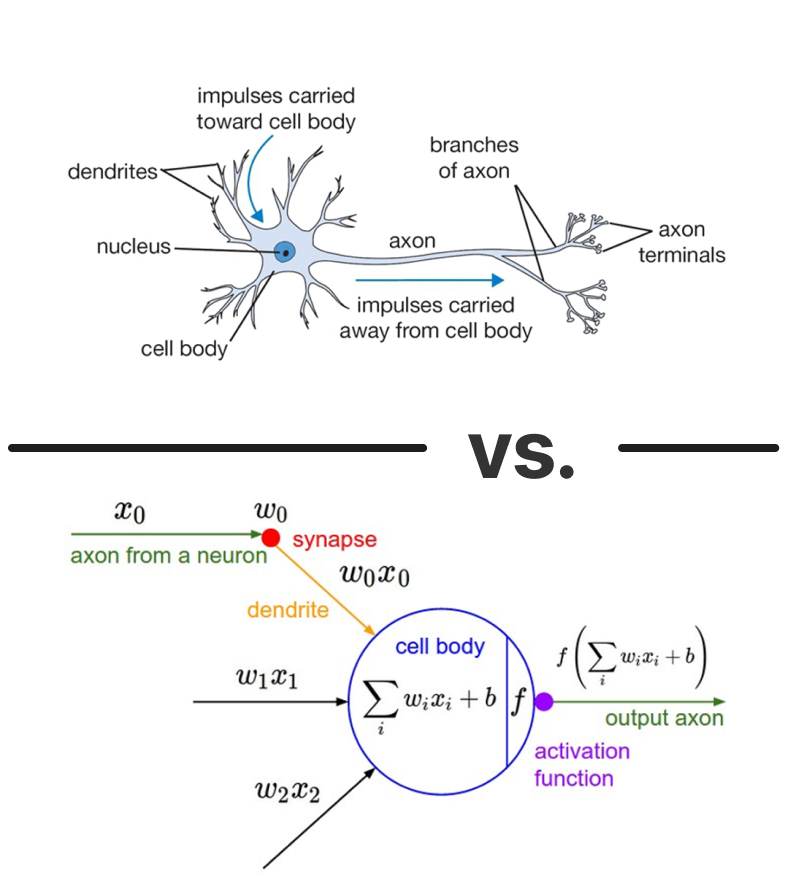

- o simplificare (uriasa) a modului in care functioneaza un neuron biologic

- o unitate care:
  - calculeaza **suma ponderata** a input-urilor
  
  - adauga o valoare de prag aka ***bias term***

  - aplica o functie **non-liniara** pe rezultatul obtinut

  - returneaza output-ul ei






Matematic vorbind,
- avem o serie de input-uri — $x_1,x_2...x_n$
- pentru fiecare avem cate o pondere — $w_1,w_2...w_n$
- calculam suma ponderata si adaugam bias-ul — $b$
$$a = \sum_{i=1}^n{w_i x_i} + b$$

<br>
<hr>
<br>

  In mod echivalent:
  - ne putem imagina ca avem un vector de input-uri ($\mathsf{x}$) inmultit cu cel de ponderi ($\mathsf{w}$), cu scalarul $b$ adunat
   
   $$\begin{align}\begin{bmatrix} w_{1} \ w_{2} \ \cdots \ w_{m} \end{bmatrix} \ \cdot \ \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{m}
\end{bmatrix} \   + \ b \ &= \\
&= \ x_1 \cdot w_1  + \ x_2 \cdot w_2 + \ ... \ + x_n \cdot w_n + \ b \end{align}$$

<br>
<br>

Atunci, putem simplifica ecuatia de mai sus (yay)


$$ a = \mathsf{w} \cdot \mathsf{x} + b$$
<br>
<hr>
<br>

Ce facem mai departe cu $a$-ul obtinut?

Il trecem printr-o functie neliniara!

$$z = \text{ReLU}(a)$$

Astfel, obtinem output-ul unui neuron — **activarea** lui.




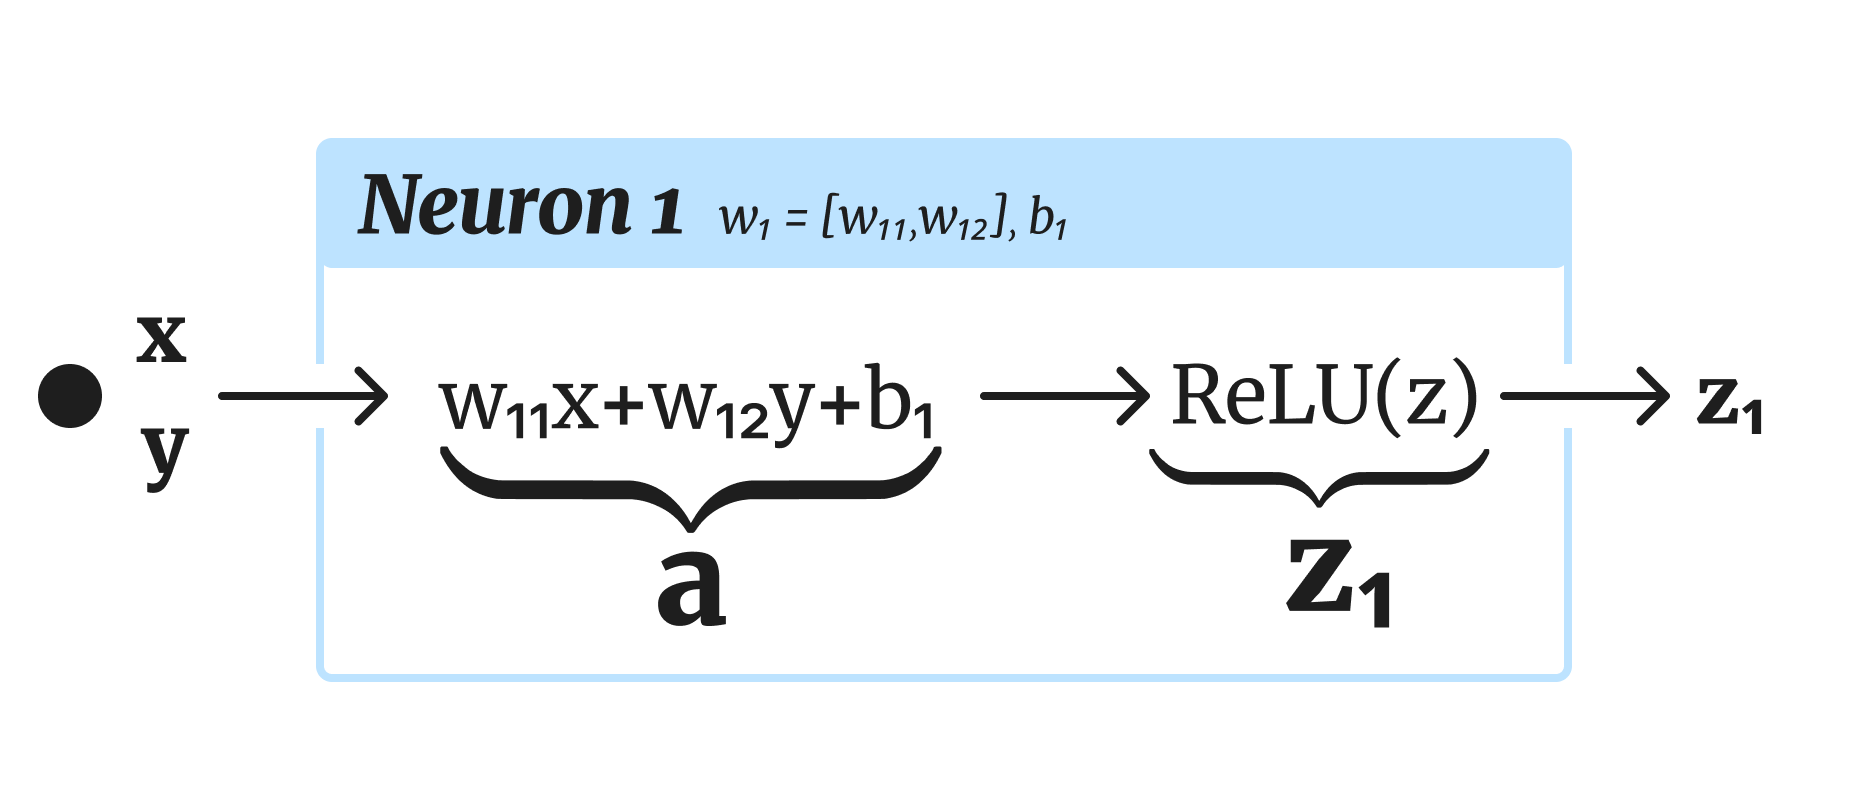

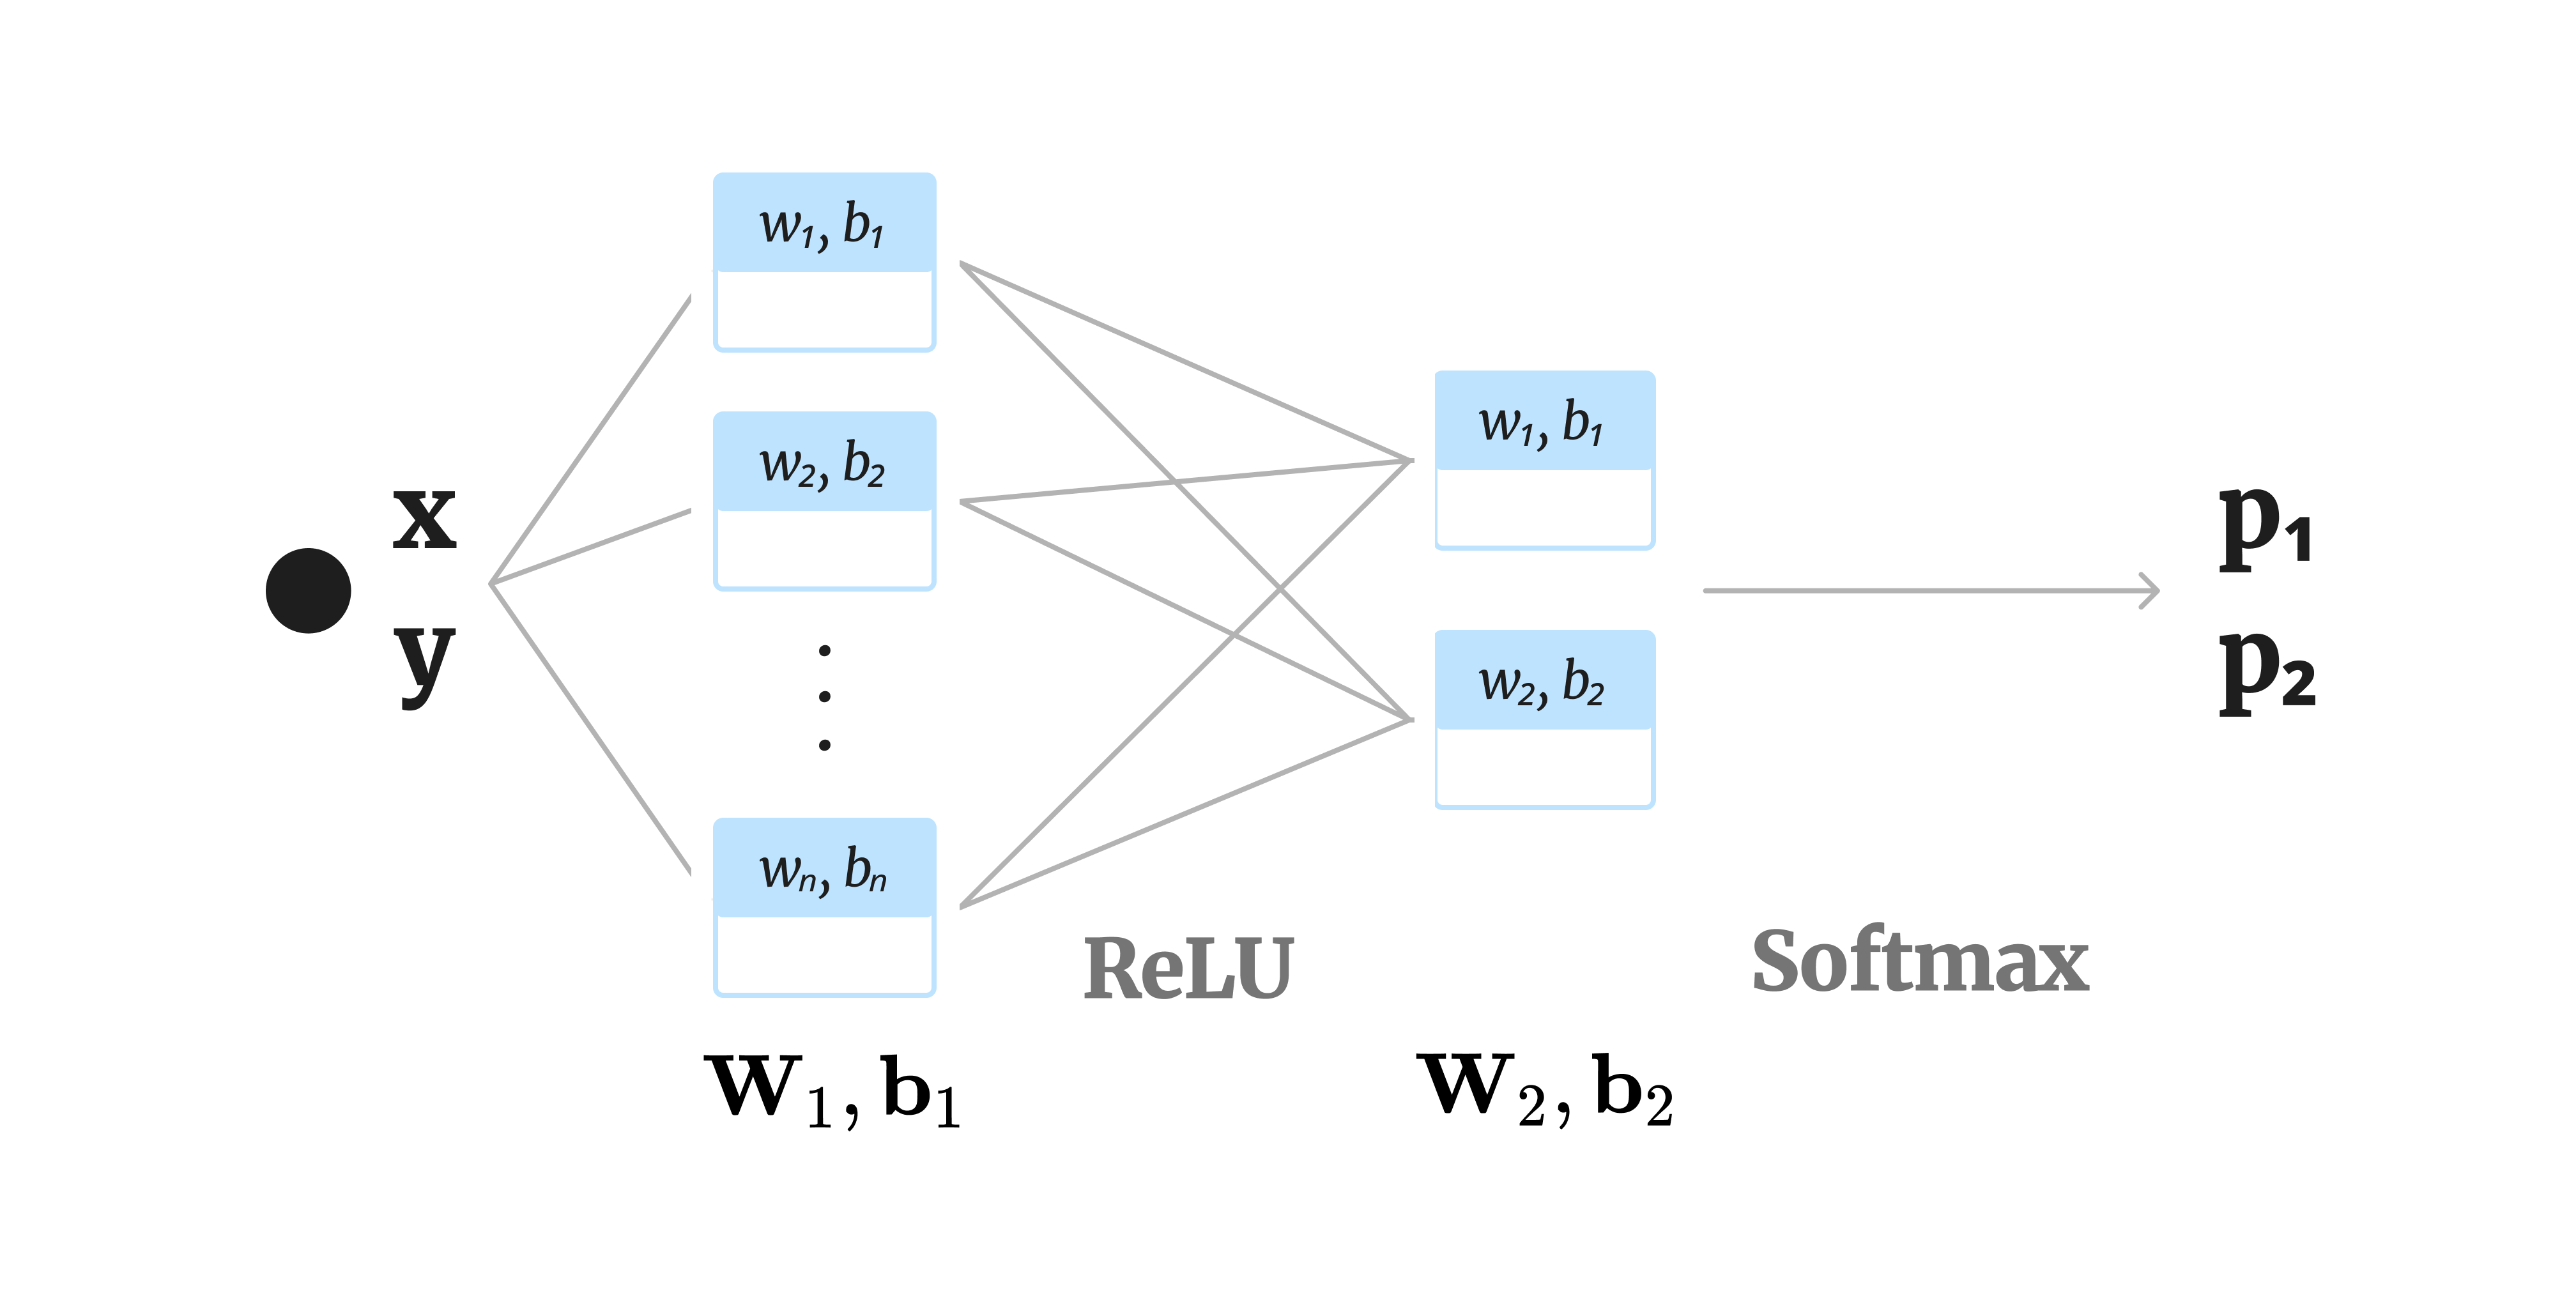

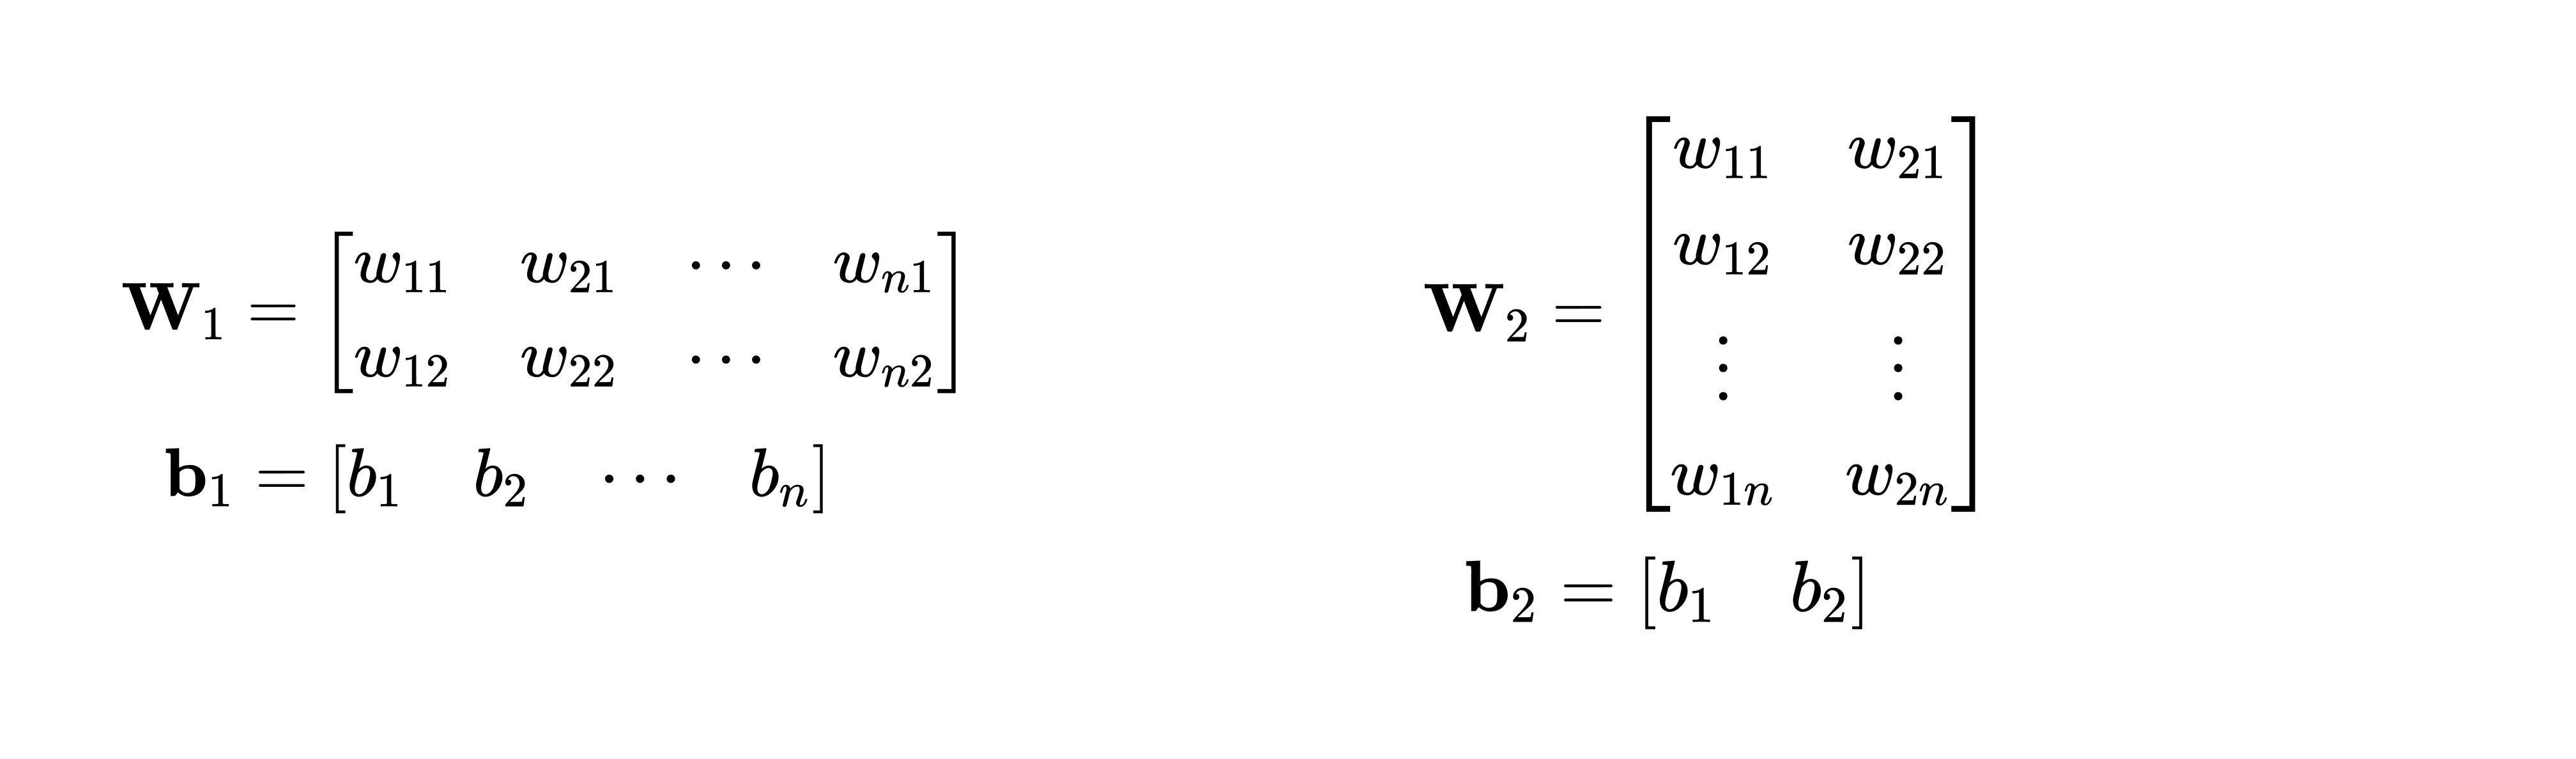

\begin{align*}
A_1 &= X W_1 + b_1 \\
Z_1 &= \max(0, A_1) \\
A_2 &= Z_1 W_2 + b_2 \\
Z_2 &= \sigma(A_2)
\end{align*}


## Combinam ingredientele

### Initializare

Pentru initializarea modelului, va trebui sa specificam
* dimensiunea input-ului,
* numarul de clase,
* numarul de neuroni ascunsi.

Apoi, folosind parametrii de mai sus, sa initializam matricile de ponderi si vectori de bias-uri.

Scrie o functie care returneaza un dictionar cu structurile respective, populate cu valori random.

In [12]:
def init_network(n_features=2, n_class=2, n_hidden=64):
    model = {
        'W1': np.random.randn(n_features, n_hidden),
        'b1': np.random.randn(n_hidden),
        'W2': np.random.randn(n_hidden, n_class),
        'b2': np.random.randn(n_class)
    }
    return model

### Forward propagation

Nu putem face multe cu matrici statice!

Defineste o functie care primeste dictionarul de mai sus si datele de input; apoi, folosind functiile definite la inceputul laboratorului, `softmax` si `relu`, calculeaza si returneaza output-ul fiecarui strat al retelei.

In [13]:
def forward(model, input_data):
    W1, W2 = model['W1'], model['W2']
    b1, b2 = model['b1'], model['b2']

    a1 = input_data @ W1 + b1
    z1 = relu(a1)
    a2 = z1 @ W2 + b2
    z2 = softmax(a2)

    return z1, z2

Foloseste functia forward ca sa scrii o functie de testare foarte simpla si aplic-o direct pe setul de test. Asigura-te ca returneaza un vector de vectori, fiecare continand 2 probabilitati. Ce acuratete obtii? Cat la suta din exemple sunt clasificate corect?

In [14]:
def test_without_fit(test_data, test_label):
    model = init_network()
    _, pred_prob = forward(model, test_data)
    pred_label = np.array([np.argmax(pred) for pred in pred_prob])
    acc = (pred_label == test_label).sum() / test_label.size
    print('Acuratete: {0:.5g}'.format(acc))
    return pred_prob

In [15]:
test_without_fit(X_test, y_test)

Acuratete: 0.4768


array([[9.99999929e-01, 7.11055647e-08],
       [9.99999987e-01, 1.32183066e-08],
       [1.00000000e+00, 1.16544885e-12],
       ...,
       [9.99993256e-01, 6.74446735e-06],
       [9.99999841e-01, 1.58610410e-07],
       [9.99999951e-01, 4.91024244e-08]])

### Backpropagation


#### Functia de loss

Acuratetea este o metrica buna pentru evaluare, dar nu ne ajuta sa imbunatatim reteaua.

Stim cat la suta din set-ul de test am clasificat corect, dar nu stim **cat de departe** am fost pentru cele gresite!

(reminder: reteaua returneaza probabilitati, deci daca probabilitatea prezisa pentru clasa corecta era 0.0001 clar este mai rau decat daca era 0.49)

Ne trebuie o metrica pentru distanta intre predictiile noastre si label-urile reale — **functia de loss**.

O alegere comuna pentru probleme de clasificare este **cross-entropy**.

<br>

$$\mathsf{cross\mbox{-}entropy} = \sum \text{(probabilitatea reala)} \times -\log(\text{probabilitatea prezisa})
$$



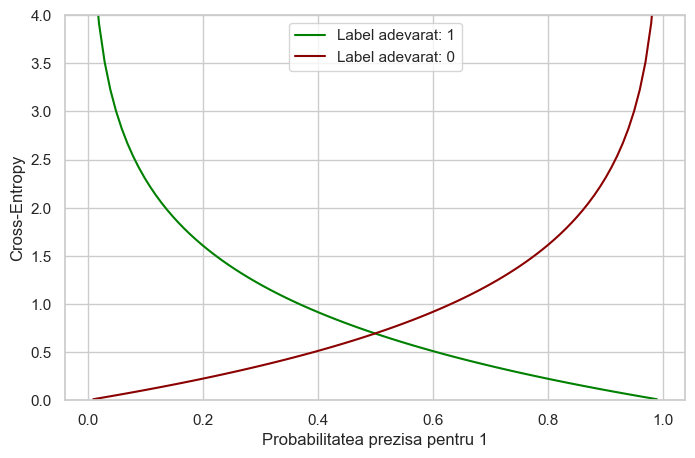

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)

loss_true_1 = -np.log(p)             # True label = 1
loss_true_0 = -np.log(1 - p)         # True label = 0

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.plot(p, loss_true_1, label="Label adevarat: 1", color="green")
plt.plot(p, loss_true_0, label="Label adevarat: 0", color="darkred")

# Labels and Legend
plt.xlabel("Probabilitatea prezisa pentru 1")
plt.ylabel("Cross-Entropy")
plt.legend()
plt.ylim(0, 4)  # Set y-axis limits for clarity
plt.show()


Foloseste functia din `sklearn.metrics` ca sa afisezi loss-ul pentru probabilitatile prezise si compara-l cu graficul. (documentatia [aici](//scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html))

In [17]:
from sklearn.metrics import log_loss

probs = test_without_fit(X_test, y_test)
loss0 = log_loss([y_test[0]],[probs[0]], labels=[0,1])
log_loss(y_test,probs)

print(f"\nlabel adevarat: {y_test[0]}\nprobabilitatea prezisa pentru 1: {probs[0][1]}")
print(f"loss: {loss0}")

Acuratete: 0.652

label adevarat: 0
probabilitatea prezisa pentru 1: 0.0058180332380259455
loss: 0.005835023927051915


#### Gradient descent

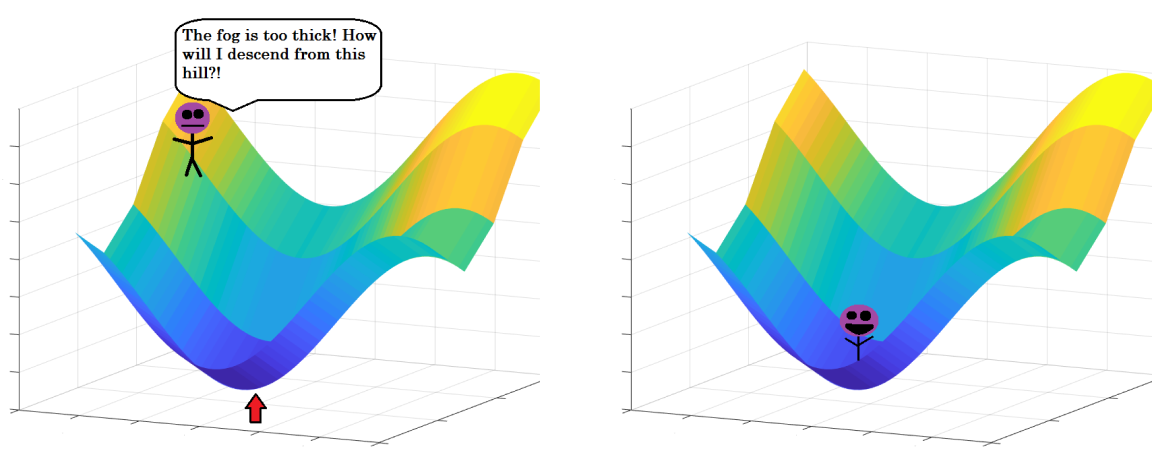

Trebuie sa schimbam parametrii astfel incat sa obtinem o performanta mai buna.

Cum ne dam seama ce schimbari sunt necesare folosind functia de loss?

Sa zicem ca avem un singur parametru $\theta$ pentru regresie, care influenteaza panta dreptei prin origine.

Atunci relatia intre valoarea lui si loss-ul poate fi vizualizata astfel:

In [19]:
#@title _
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Javascript

# Generating synthetic data with no noise
np.random.seed(0)
x = np.linspace(-1, 1, 20)
y = 0.5 * x  # Linear relationship with no noise

# Cost function
def cost_function(theta, x, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((theta * x - y) ** 2)

# Gradient descent parameters
theta_values = [0.05, 0.184, 0.301, 0.374, 0.42, 0.5]  # Iterations of theta
costs = [cost_function(theta, x, y) for theta in theta_values]

# Plotting setup
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: Data and linear fits
axes[0].scatter(x, y, color='black', label="Data", zorder=5, marker='x')
lines = [axes[0].plot([], [], label=f"$\\theta_1 = {theta:.3f}$")[0] for theta in theta_values]
axes[0].set_title("Data and fit")
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$y$")
axes[0].legend()

# Right plot: Cost function
theta_range = np.linspace(-0.2, 1, 100)
cost_range = [cost_function(theta, x, y) for theta in theta_range]
axes[1].plot(theta_range, cost_range, color='black', label="Loss function")
points = [axes[1].scatter([], [], label=f"$\\theta_1 = {theta:.3f}$", zorder=5) for theta in theta_values]
axes[1].set_title("Loss function")
axes[1].set_xlabel("$\\theta_1$")
axes[1].set_ylabel("$J(\\theta)$")
axes[1].legend()

# Animation function
def update(frame):
    for i in range(frame + 1):
        lines[i].set_data(x, theta_values[i] * x)  # Update lines on the left plot
        points[i].set_offsets([theta_values[i], costs[i]])  # Update points on the right plot
    return lines + points

plt.close(fig)

ani = FuncAnimation(fig, update, frames=len(theta_values), interval=1000, blit=True)

html_animation = ani.to_jshtml()
autoplay_html = f"""
<script>
    setTimeout(() => {{
        document.querySelector('button[aria-label="Play"]').click();
    }}, 500);
</script>
{html_animation}
"""

# Display the animation
display(HTML(autoplay_html))


Daca avem 2 parametri, $\theta_1$ si $\theta_2$

In [ ]:
#@title _
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Generating synthetic data
np.random.seed(0)
x = np.linspace(-1, 1, 20)
y = 0.4 * x + 0.2  # Linear relationship

# Hypothesis function
def hypothesis(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Cost function
def cost_function(theta_0, theta_1, x, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(theta_0, theta_1, x) - y) ** 2)

# Partial derivatives for gradient descent
def gradient_descent_step(theta_0, theta_1, x, y, alpha):
    m = len(y)
    error = hypothesis(theta_0, theta_1, x) - y
    grad_0 = (1 / m) * np.sum(error)
    grad_1 = (1 / m) * np.sum(error * x)
    theta_0 -= alpha * grad_0
    theta_1 -= alpha * grad_1
    return theta_0, theta_1

# Gradient descent parameters
theta_0, theta_1 = -0.5, -1.0
alpha = 0.5
iterations = 30
trajectory = [(theta_0, theta_1, cost_function(theta_0, theta_1, x, y))]

for _ in range(iterations):
    theta_0, theta_1 = gradient_descent_step(theta_0, theta_1, x, y, alpha)
    trajectory.append((theta_0, theta_1, cost_function(theta_0, theta_1, x, y)))

trajectory = np.array(trajectory)

# Generate cost surface for visualization
theta_0_vals = np.linspace(-0.5, 1, 100)
theta_1_vals = np.linspace(-1, 1, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_vals, theta_1_vals)
cost_vals = np.array([
    cost_function(theta_0, theta_1, x, y)
    for theta_0, theta_1 in zip(np.ravel(theta_0_grid), np.ravel(theta_1_grid))
]).reshape(theta_0_grid.shape)

# Plot setup
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')  # 3D surface plot
ax2 = fig.add_subplot(122)  # Line fit plot

# 3D Cost function surface
surf = ax1.plot_surface(theta_0_grid, theta_1_grid, cost_vals, alpha=0.8, cmap='RdYlGn_r', edgecolor='none')
ax1.set_title("Cost Function Surface")
ax1.set_xlabel("$\\theta_1$")
ax1.set_ylabel("$\\theta_2$")
ax1.set_zlabel("$J(\\theta_1, \\theta_2)$")
ax1.view_init(elev=30, azim=45, roll=0)
trajectory_line, = ax1.plot([], [], [], 'k-', label="Gradient Descent Path", zorder=10)
trajectory_points, = ax1.plot([], [], [], 'ko', label="Gradient Descent Points", zorder=10)

# Line fit plot
ax2.scatter(x, y, color='grey', label="Data", zorder=5, marker='x')
fit_line, = ax2.plot([], [], label="Fit", color='black', lw=2)
ax2.set_title("Line Fit")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")

ax2.legend()

def update(frame):
    # Gradient descent trajectory
    t_0, t_1, t_cost = trajectory[frame]
    trajectory_line.set_data(trajectory[:frame+1, 0], trajectory[:frame+1, 1])
    trajectory_line.set_3d_properties(trajectory[:frame+1, 2])
    trajectory_points.set_data([t_0], [t_1])  # Wrap scalars in lists
    trajectory_points.set_3d_properties([t_cost])  # Wrap scalar in list

    # Line fit for current parameters
    fit_line.set_data(x, t_0 + t_1 * x)
    return trajectory_line, trajectory_points, fit_line

plt.close(fig)  # Prevent static display

ani = FuncAnimation(fig, update, frames=len(trajectory), interval=500, blit=True)

html_animation = ani.to_jshtml()
autoplay_html = f"""
<script>
    setTimeout(() => {{
        document.querySelector('button[aria-label="Play"]').click();
    }}, 500);
</script>
{html_animation}
"""

# Display the animation
display(HTML(autoplay_html))



### Chain Rule

postarea completa lui Chris Olah [aici](//colah.github.io/posts/2015-08-Backprop/)

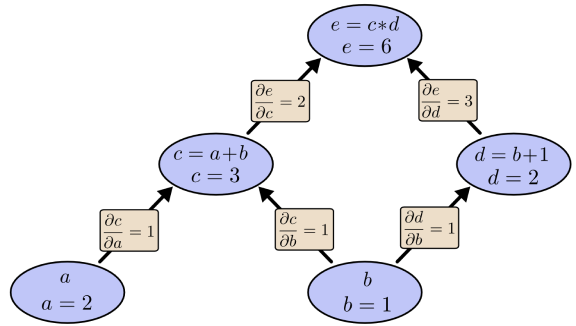

In esenta, ne intereseaza cat de mult influenteaza fiecare parametru output-ul functiei de loss.

Exemplu: daca dublez ponderea neuronului 3 din stratul 2 ($w_{2,3}$), cat de mult o sa ma ajute sa clasific punctele corect? Dar daca o triplez?

Asta ne spune derivata functiei de loss in raport cu parametrul respectiv.

$$\frac{\partial L}{\partial w_{2}}$$

O putem calcula folosind chain rule — formula de derivare a functiilor compuse.

$$\frac{\partial f(g(x))}{\partial x} = \frac{\partial f(x)}{\partial g} \cdot \frac{\partial g(x)}{\partial x}
$$


In final vrem sa ajungem la **gradient**, adica pur si simplu toate derivatele calculate puse intr-un vector.

$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$


Acesta ne va spune **in ce directie** si **cat de mult** trebuie sa schimbam fiecare parametru.

Deci, mai exact, vrem sa obtinem pentru primul strat:

$$\nabla_{W_1} L = \begin{bmatrix} \frac{\partial L}{\partial w_{1,1}} \\ \frac{\partial L}{\partial w_{1,2}} \\ \vdots \\ \frac{\partial L}{\partial w_{64,2}} \end{bmatrix}$$

si

$$\nabla_{b_1} L = \begin{bmatrix} \frac{\partial L}{\partial b_{1,1}} \\ \frac{\partial L}{\partial b_{1,2}} \\ \vdots \\ \frac{\partial L}{\partial b_{1,64}} \end{bmatrix}$$

si fix la fel si pentru al doilea.



"Chain-ul" in cazul nostru arata asa:

\begin{align*}
A_1 &= X W_1 + b_1 \\
Z_1 &= \max(0, A_1) \\
A_2 &= Z_1 W_2 + b_2 \\
Z_2 &= \sigma(A_2)
\end{align*}

Aplicand back-propagation de la ultimul strat, avem urmatoarele formule simple:

gradientul $A_2$: $\ \ Z_2-y$

gradientul $W_2$: $\ Z_1^T$ ∙ gradientul $A_2$

gradientul $Z_1$: $\ $ gradientul $A_2$ ∙ $W_2^T$

gradientul $A_1$: $\ I[$gradientul $Z_1]$

<br>
unde
$$I[X] = \begin{cases}
1 & (x \geq 1) \\
0 & (x < 0)
\end{cases}$$
<br>

gradientul $W_1$: $\ $ $X^T$∙ gradientul $A_1$

In [ ]:
def backward(model, data, label):
    # fa un forward ca sa obtii output-urile, z1 (stratul ascuns) si z2 (output-ul final)
    z1, z2 = forward(model, data)

    # converteste label-urile in vectori one-hot
    label = one_hot_encode(label)

    print(f"z2:\n{z2}")
    print(f"label:\n{label}")

    # calculeaza eroarea (diferenta intre output-ul si true label)
    dA2 = label - z2
    print(dA2.shape)

    # ca sa obtii gradientul pentru b2, insumeaza coloanele matricii de mai sus
    db2 = np.sum(dA2, axis=0)
    print(db2.shape)

    # calculeaza gradientul pentru w2
    dW2 = z1.T @ dA2

    # calculeaza gradientul pentru z1
    dz1 = dA2 @ model['W2'].T

    # aplica gate-ul I() ca sa obtii dA1
    dz1[z1 <= 0] = 0
    dA1 = dz1

    # ca sa obtii gradientul pentru b1, insumeaza coloanele matricii de mai sus
    db1 = np.sum(dA1, axis=0)

    # calculeaza gradientul pentru w1
    dW1 = data.T @ dA1

    return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}

In [ ]:
model = init_network()
backward(model, X_train, y_train)

z2:
[[4.18999311e-06 9.99995810e-01]
 [1.93523585e-05 9.99980648e-01]
 [7.56535980e-05 9.99924346e-01]
 ...
 [1.70812476e-04 9.99829188e-01]
 [2.96327395e-04 9.99703673e-01]
 [3.44974550e-04 9.99655025e-01]]
label:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
(3750, 2)
(2,)


{'W1': array([[ 6.15832743e+02,  3.90425998e+02, -4.14202835e+00,
          4.65638861e+02, -5.71478262e+01, -2.71139964e+02,
          1.37764922e+03,  2.71098755e+00,  1.44349348e+00,
          5.96887889e+01,  4.75852447e+00, -1.26201196e+02,
          1.01944396e-03,  3.96612449e+02, -3.59722992e+02,
         -3.58985010e+00, -1.26265568e+01, -2.87447453e-01,
          7.13500525e-06,  4.15714597e+02,  5.84956593e+02,
         -6.49215186e+02,  1.42065752e+03, -9.52084332e-01,
         -1.08578451e+02, -9.96893047e+01, -1.15269098e-01,
         -1.07193668e+01,  2.38866127e+02,  6.70858350e+02,
          0.00000000e+00, -1.53194576e+00, -3.37176313e+02,
          8.74444876e+01, -2.59072078e+00, -6.53072494e+01,
         -1.16284065e+03,  2.51948246e+02,  0.00000000e+00,
          0.00000000e+00, -8.01468485e+02,  7.70130143e+01,
         -3.54972183e+02, -2.46781799e+03, -4.36477445e+00,
          6.81944632e+02,  1.70491933e+02, -1.89711735e+02,
          2.28946525e+02,  1.62340

Dupa ce am obtinut gradientul, ne apucam sa schimbam valorile parametrilor folosind formula de mai jos!

$$w_{nou} = w_{vechi} - \alpha \cdot \nabla_w L$$
unde $\alpha$ este **learning rate**-ul si ne spune cat de repede vrem sa coboram pe gradient.

In [ ]:
def sgd(model, data, label, alpha=1e-4):
    # calculeaza gradientul folosind functia backward
    grad = backward(model, data, label)

    # schimba parametrii fiecarui layer (foloseste += pentru ca am calculat gradientul negativ)
    for layer in grad.keys():
        model[layer] += alpha * grad[layer]
    return model

Vrem sa putem face asta pentru mai multe **epoci** pentru rezultate mai bune. In alte cuvinte, vrem ca modelul sa fie expus la toate datele de antrenare de mai multe ori, ca sa le invete mai bine.

Pe langa asta, vrem ca modelul sa primeasca datele amestecate, in **batch**-uri mai mici (pentru eficienta computationala mai buna).

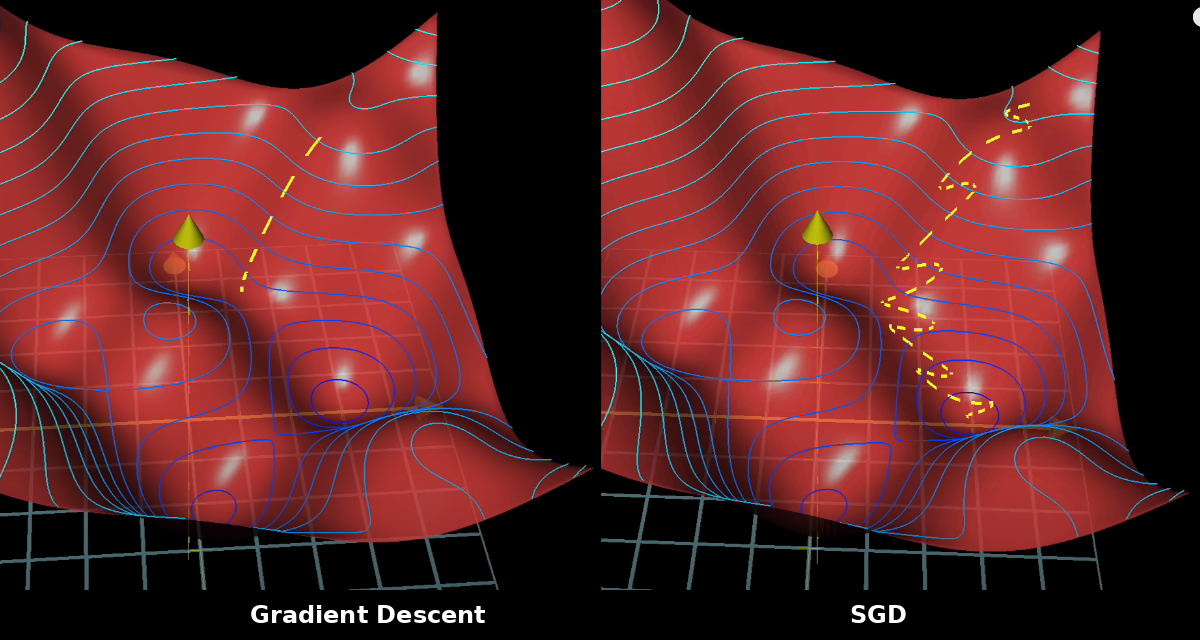

In [ ]:
def fit(model, input_data, label, batch_size, iter_num):
    # pentru fiecare epoca
    for epoch in range(iter_num):

        # amesteca etichetele si datele de intrare
        p = np.random.permutation(len(label))
        input_data, label = input_data[p], label[p]

        # pentru fiecare batch aplica sgd
        for i in range(0, len(label), batch_size):
            batch_data, batch_label = input_data[i:i + batch_size], label[i:i + batch_size]
            model = sgd(model, batch_data, batch_label)
    return model

Modifica functia de test definita data trecuta ca sa foloseasca si functia de fit.

In [ ]:
def test(train_data, train_label, test_data, test_label, batch_size, iter_num, n_experiment):
    acc_lst = []
    for k in range(n_experiment):
        model = init_network()
        model = fit(model, train_data, train_label, batch_size=batch_size, iter_num=iter_num)
        _, pred_label = forward(model, test_data)
        pred_label = np.array([np.argmax(pred) for pred in pred_label])
        acc_lst.append((pred_label == test_label).sum() / test_label.size)
    acc_lst = np.array(acc_lst)
    print('Mean Accuracy: {0:.5g}, Standard Deviation: {1:.5g}'.format(acc_lst.mean(), acc_lst.std()))

## Toata reteta la un loc

In [ ]:
class NeuralNet:

    def __init__(self, n_hidden, n_features=2, n_class=2):
        self.params = {
            'W1': np.random.randn(n_features, n_hidden),
            'b1': np.random.randn(n_hidden),
            'W2': np.random.randn(n_hidden, n_class),
            'b2': np.random.randn(n_class)
        }

    def forward(self, input_data):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = input_data @ W1 + b1
        self.params['z1'] = relu(a1)
        a2 = self.params['z1'] @ W2 + b2
        self.params['z2'] = softmax(a2)

        return self.params['z1'], self.params['z2']

    def fit(self, input_data, label, batch_size, iter_num):
        for epoch in range(iter_num):
            p = np.random.permutation(len(label))
            input_data, label = input_data[p], label[p]
            for i in range(0, len(label), batch_size):
                batch_data, batch_label = input_data[i:i + batch_size], label[i:i + batch_size]
                self.sgd(batch_data, batch_label)

    def sgd(self, data, label, alpha=1e-4):
        grad = self.backward(data, label)
        for layer in grad.keys():
            self.params[layer] += alpha * grad[layer]

    def backward(self, data, label):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        z1, z2 = self.forward(data)

        label = one_hot_encode(label)
        db2_temp = label - z2
        db2 = np.sum(db2_temp, axis=0)
        dW2 = z1.T @ db2_temp
        db1_temp = db2_temp @ W2.T
        db1_temp[z1 <= 0] = 0
        db1 = np.sum(db1_temp, axis=0)
        dW1 = data.T @ db1_temp

        return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}

    def test(self, train_data, train_label, test_data, test_label, batch_size, iter_num):
        self.fit(train_data, train_label, batch_size=batch_size, iter_num=iter_num)
        _, pred_label = self.forward(test_data)
        pred_label = np.array([np.argmax(pred) for pred in pred_label])
        acc = (pred_label == test_label).sum() / test_label.size
        return acc

Initiaza network-ul cu un alt numar de neuroni si compara rezultatele.


In [ ]:
net = NeuralNet(99)
net.test(X_train, y_train, X_test, y_test, 20, 10)

## Hyperparameter tuning

Ca orice reteta, cantitatile ingredientelor pot fi modificate dupa gust, in functie de ocazie.

**Hiperparametrii** (a nu se confunda cu **parametrii**, aka ponderile si bias-urile din fiecare strat) sunt sarea si piperul care pot sa faca mancarea foarte delicioasa... sau dezgustatoare.

Exista multe exemple de hiperparametri. Unul foarte simplu si foarte important este numarul de neuroni.

Mai jos este o functie care sa ilustreze performanta retelei noastre, in functie de numarul de neuroni din stratul ascuns.

In [ ]:
from tqdm import tqdm
def test_class(min_neuron, max_neuron, n_trial):
    acc_lst = []
    domain = np.arange(min_neuron, max_neuron,step=500)
    for n_neuron in tqdm(domain):
        acc_ = []
        for _ in range(n_trial):
            net = NeuralNet(n_neuron)
            acc = net.test(X_train, y_train, X_test, y_test, 20, 10)
            acc_.append(acc)
        acc_score = sum(acc_) / len(acc_)
        acc_lst.append(acc_score)
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel="Number of Neurons", ylabel="Accuracy")
    ax.plot(domain, acc_lst, color='skyblue')
    plt.show()

In [ ]:
test_class(2, 8000, 2)

#Mai multe resurse


- [Neural Networks, Clearly Explained!!!](//youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&feature=shared) (probabil cele mai bune explicatii out there)

 [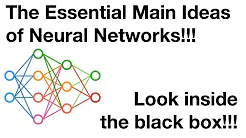](//youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&feature=shared)


- [Backpropagation](//www.youtube.com/watch?v=SmZmBKc7Lrs) explicat de un tip care face computational neuroscience, ilustrat foarte frumos

  [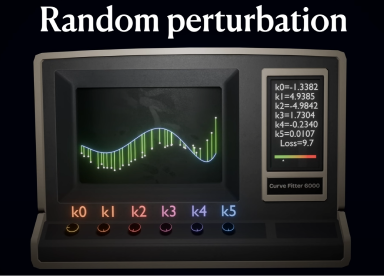](//www.youtube.com/watch?v=SmZmBKc7Lrs)

- un [curs interactiv](//developers.google.com/machine-learning/crash-course/neural-networks) de la Google
  
  [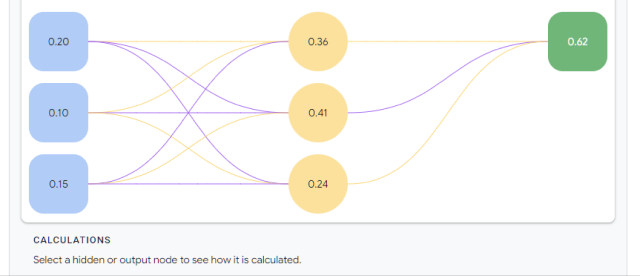](//developers.google.com/machine-learning/crash-course/neural-networks)

- [postarea originala lui Jake Tae](//jaketae.github.io/study/neural-net/) pe care e bazat laboratorul